In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('train.csv')

df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [3]:
df['Number of words co-lead'] = df['Number of words lead'] - df['Difference in words lead and co-lead']

# Logistic Regression

In [4]:
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing as pre


In [5]:
X = df[['Total words','Number words female','Number words male','Number of words lead','Number of words co-lead','Number of male actors','Number of female actors','Year','Gross']]
y = df['Lead']



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50)
scaler = pre.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)


In [7]:
model = skl_lm.LogisticRegression()
model.fit(X_scaled,y_train)
prediction = model.predict(X_test)

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,precision_score
print(f'Accuracy : {accuracy_score(y_test,prediction):.3f}')
print(classification_report(y_test,prediction))


Accuracy : 0.840
              precision    recall  f1-score   support

      Female       0.71      0.25      0.38        59
        Male       0.85      0.98      0.91       253

    accuracy                           0.84       312
   macro avg       0.78      0.62      0.64       312
weighted avg       0.82      0.84      0.81       312



/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


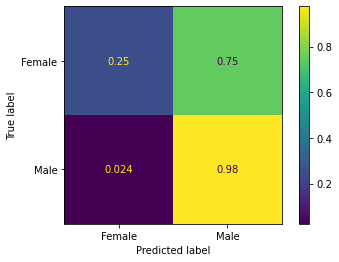

In [9]:
fig = plot_confusion_matrix(model,X_test,y_test,normalize = 'true')
fig.figure_.savefig('conf_mat.png',dpi=300)

In [10]:
#naive classifier

print('Accuracy:')
print(f"{np.mean(y_test == 'Male'):.3f}")

Accuracy:
0.811


In [11]:
log_model = skl_lm.LogisticRegression(C =2.7825594022071245, max_iter = 100, penalty = 'l1', solver = 'liblinear')

log_model.fit(X_train,y_train)

LogisticRegression(C=2.7825594022071245, penalty='l1', solver='liblinear')

In [12]:
log_prediction = log_model.predict(X_test)


In [13]:
print(f'Accuracy : {accuracy_score(y_test,log_prediction):.3f}')
print(classification_report(y_test,prediction))

Accuracy : 0.875
              precision    recall  f1-score   support

      Female       0.71      0.25      0.38        59
        Male       0.85      0.98      0.91       253

    accuracy                           0.84       312
   macro avg       0.78      0.62      0.64       312
weighted avg       0.82      0.84      0.81       312



In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, log_prediction).ravel()
print(f'Accuracy = {(tp+tn)/(tp+fp+tn+fn):.3f}')
print(f'Precision = {(tp)/(tp+fp):.3f}')
print(f'Sensitivity = {(tp)/(tp+fn):.3f}')
print(f'Specificity = {(tn)/(fp+tn):.3f}')


Accuracy = 0.875
Precision = 0.902
Sensitivity = 0.949
Specificity = 0.559


# Cross Validation


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_train, y_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.850 accuracy with a standard deviation of 0.037
